In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../dataset/hotel_booking.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.fillna({
    'children': 0,
    'agent':0,
    'company':0,
    'country':'Unknown'
}, inplace = True)

In [6]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
df.shape

(119390, 36)

Text(0.5, 1.0, 'Cancellation Rates by Hotel Type')

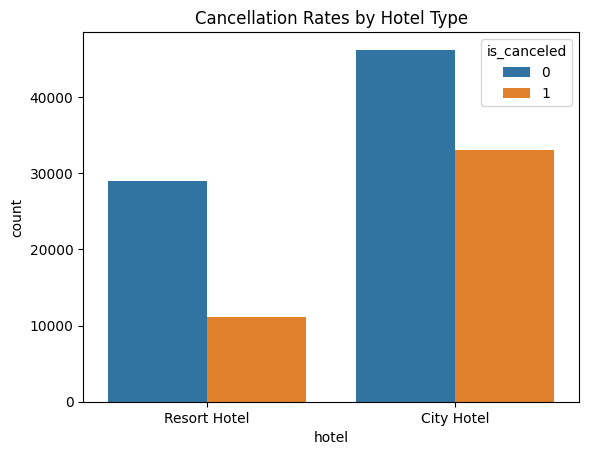

In [8]:
#cancellation rate
sns.countplot(x=df.hotel, hue=df.is_canceled)
plt.title("Cancellation Rates by Hotel Type")

<Axes: xlabel='customer_type', ylabel='count'>

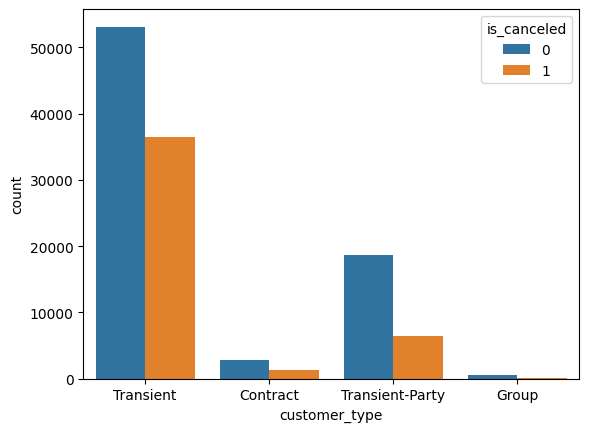

In [9]:
sns.countplot(x=df.customer_type, hue=df.is_canceled)

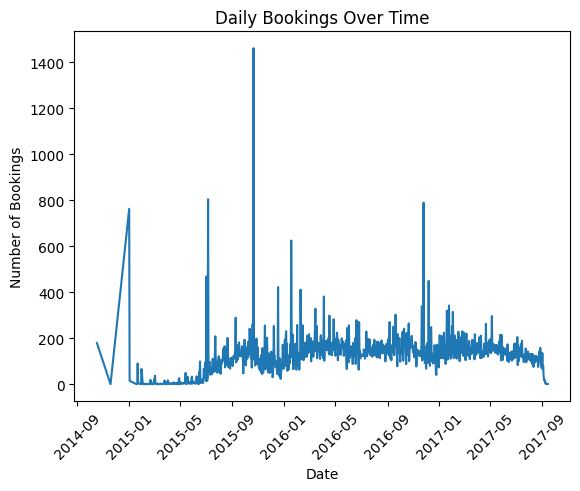

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
daily_bookings = df.groupby('reservation_status_date').size()
sns.lineplot(x=daily_bookings.index, y=daily_bookings.values)
plt.title("Daily Bookings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Boxplot of ADR')

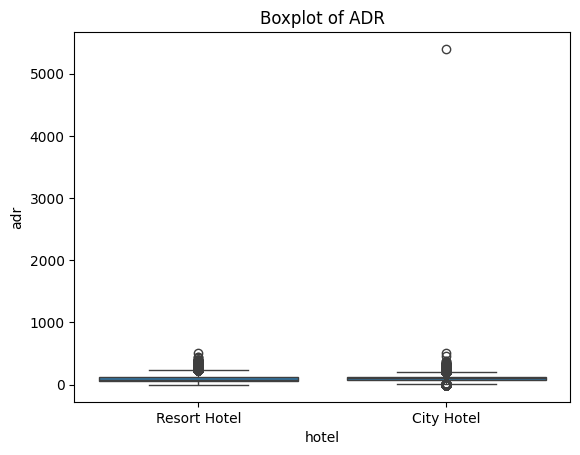

In [11]:
#ADR distribution and boxplot
sns.boxplot(x=df.hotel, y=df.adr)
plt.title('Boxplot of ADR')

In [12]:
def detect_outliners_iqr(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, q1, q3, lower_bound, upper_bound

outliners, q1, q3, lower_bound, upper_bound = detect_outliners_iqr(df, 'adr')
print("Number of outliers:", len(outliners))

Number of outliers: 3793


In [13]:
cleaned_df = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]
print("Outliners removed. Original Data shape", df.shape)
print("Cleaned data shape", cleaned_df.shape)

Outliners removed. Original Data shape (119390, 36)
Cleaned data shape (115597, 36)


In [14]:
def detect_outliners_iqr(cleaned_df,column):
    q1 = cleaned_df[column].quantile(0.25)
    q3 = cleaned_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    return outliers, q1, q3, lower_bound, upper_bound

outliners, q1, q3, lower_bound, upper_bound = detect_outliners_iqr(cleaned_df, 'adr')
print("Number of outliers:", len(outliners))



Number of outliers: 1032


In [29]:
def detect_outliners_iqr(cleaned_df,column):
    q1 = cleaned_df[column].quantile(0.25)
    q3 = cleaned_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    return outliers, q1, q3, lower_bound, upper_bound

outliners, q1, q3, lower_bound, upper_bound = detect_outliners_iqr(cleaned_df, 'adr')
print("Number of outliers:", len(outliners))
cleaned_df = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]


Number of outliers: 467


In [30]:
def detect_outliners_iqr(cleaned_df,column):
    q1 = cleaned_df[column].quantile(0.25)
    q3 = cleaned_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    return outliers, q1, q3, lower_bound, upper_bound

outliners, q1, q3, lower_bound, upper_bound = detect_outliners_iqr(cleaned_df, 'adr')
print("Number of outliers:", len(outliners))
cleaned_df = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]

Number of outliers: 0


Text(0.5, 1.0, 'Boxplot of ADR after Outlier Removal')

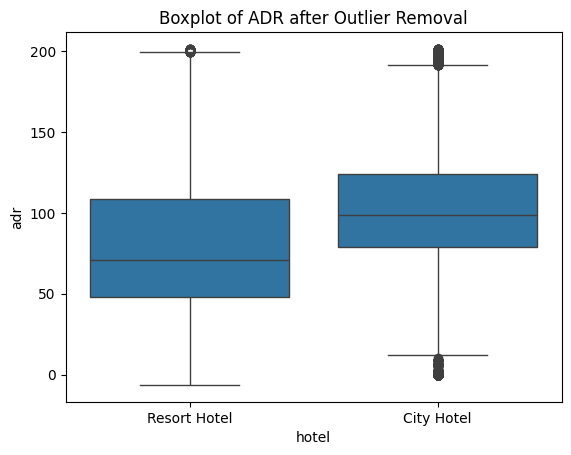

In [16]:
sns.boxplot(x=cleaned_df.hotel, y=cleaned_df.adr)
plt.title('Boxplot of ADR after Outlier Removal')


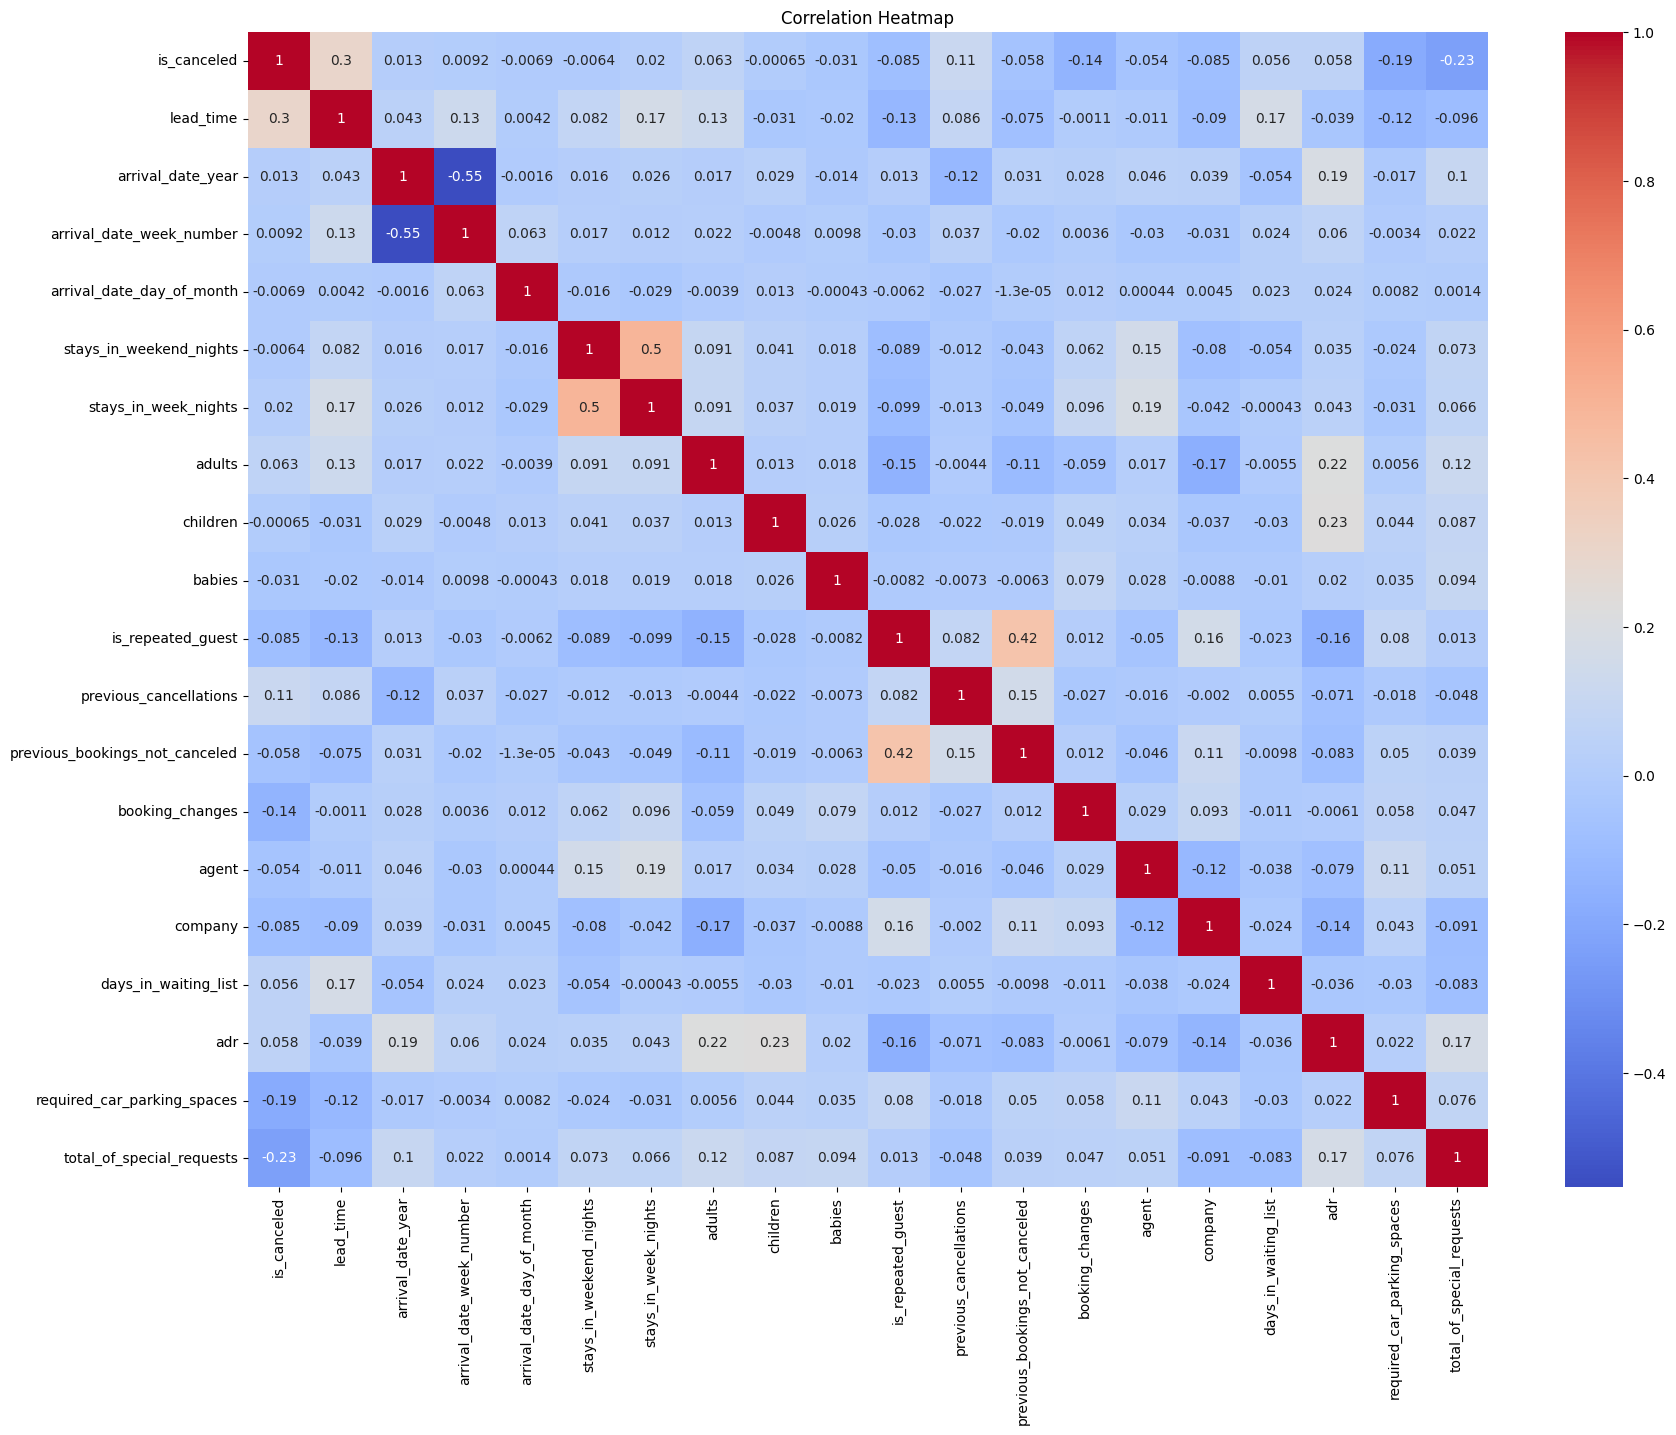

In [17]:
# correlation heatmap
plt.figure(figsize=(20,15))
sns.heatmap(cleaned_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'Number of Bookings')

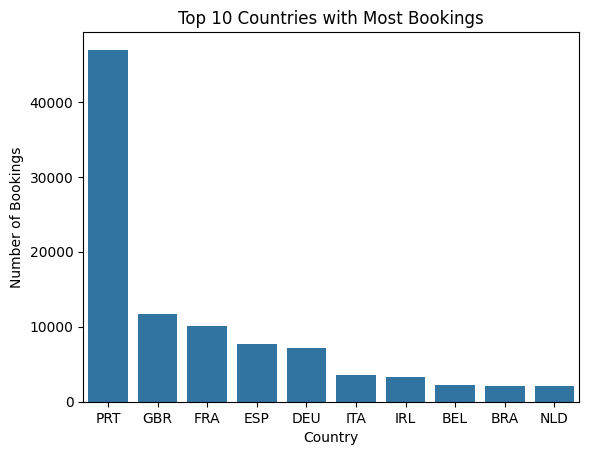

In [18]:
countries = cleaned_df['country'].value_counts().head(10)
sns.barplot(x=countries.index, y=countries.values)
plt.title('Top 10 Countries with Most Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')

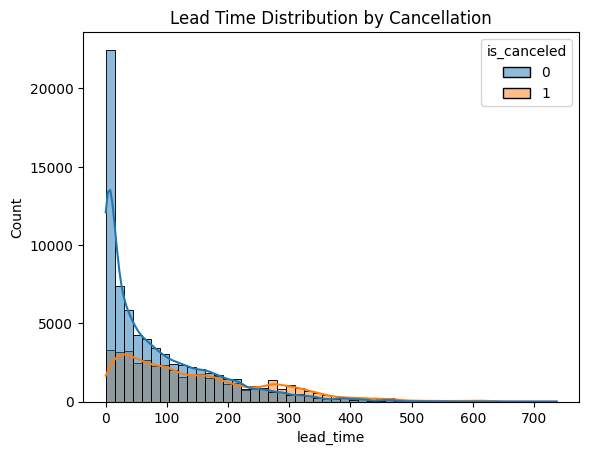

In [19]:
#lead time vs cancellation probability
sns.histplot( x=cleaned_df.lead_time, hue=cleaned_df.is_canceled, bins=50, kde=True)
plt.title("Lead Time Distribution by Cancellation")
plt.show()

Text(0, 0.5, 'Total Special Requests')

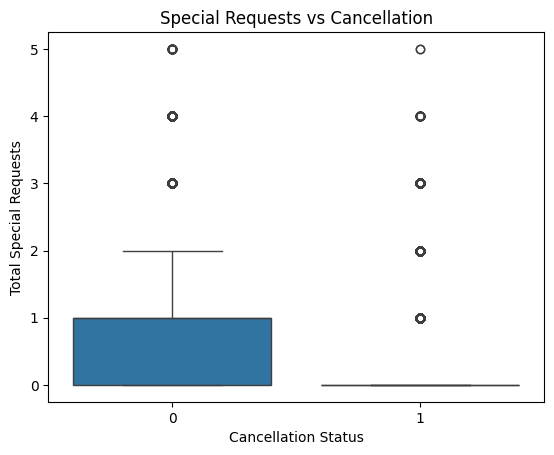

In [20]:
#special request and cancellation
sns.boxplot(x=cleaned_df.is_canceled, y=cleaned_df.total_of_special_requests)
plt.title('Special Requests vs Cancellation')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Special Requests')

In [21]:
def detect_outliners_iqr(cleaned_df,column):
    q1 = cleaned_df[column].quantile(0.25)
    q3 = cleaned_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    return outliers, q1, q3, lower_bound, upper_bound

outliners, q1, q3, lower_bound, upper_bound = detect_outliners_iqr(cleaned_df,'total_of_special_requests')
print("Number of outliers:", len(outliners))

Number of outliers: 2594


In [22]:
cleaned_df1 = cleaned_df[(cleaned_df['total_of_special_requests'] >= lower_bound) & (cleaned_df['total_of_special_requests'] <= upper_bound)]
print("Outliners removed. Original Data shape", cleaned_df.shape)
print("Cleaned data shape", cleaned_df1.shape)

Outliners removed. Original Data shape (114565, 36)
Cleaned data shape (111971, 36)


In [23]:
def detect_outliners_iqr(cleaned_df1,column):
    q1 = cleaned_df1[column].quantile(0.25)
    q3 = cleaned_df1[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = cleaned_df1[(cleaned_df1[column] < lower_bound) | (cleaned_df1[column] > upper_bound)]
    return outliers, q1, q3, lower_bound, upper_bound

outliners, q1, q3, lower_bound, upper_bound = detect_outliners_iqr(cleaned_df1,'total_of_special_requests')
print("Number of outliers:", len(outliners))

Number of outliers: 0


<Axes: ylabel='total_of_special_requests'>

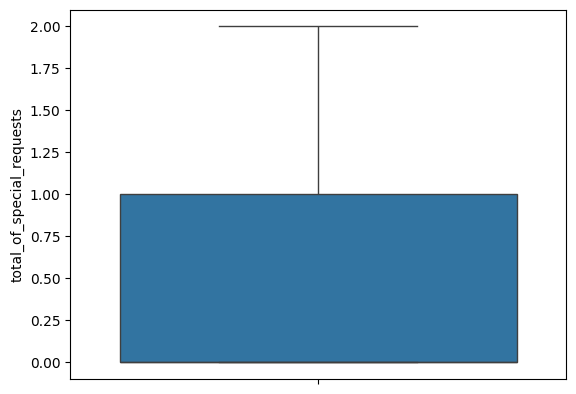

In [24]:
sns.boxplot( y=cleaned_df1.total_of_special_requests)


Text(0, 0.5, 'Booking Count')

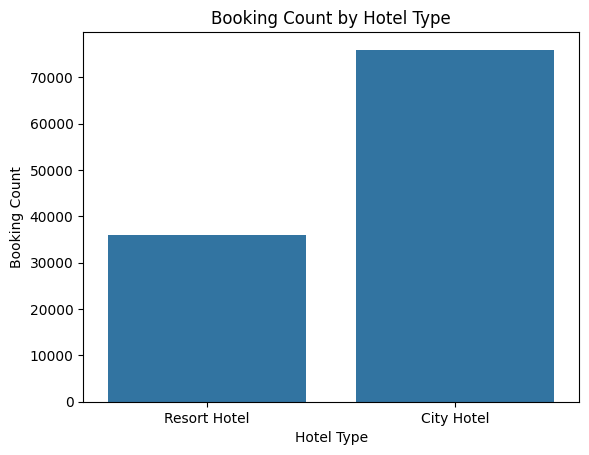

In [25]:
#booking by hotel type
sns.countplot(x=cleaned_df1.hotel)
plt.title('Booking Count by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Booking Count')

Text(0, 0.5, 'Frequency')

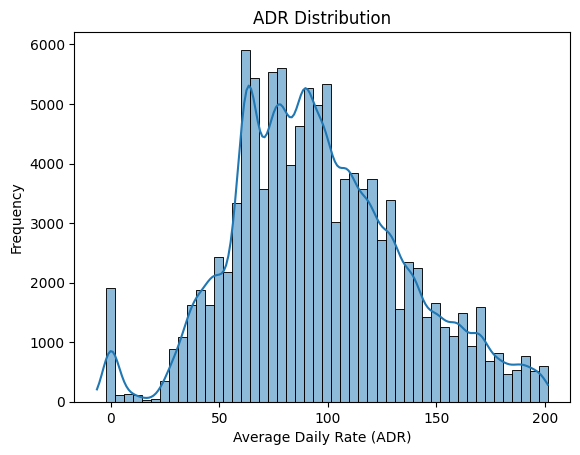

In [26]:
#ADR distribution
sns.histplot(cleaned_df1['adr'], bins=50, kde=True)
plt.title('ADR Distribution')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Number of Bookings')

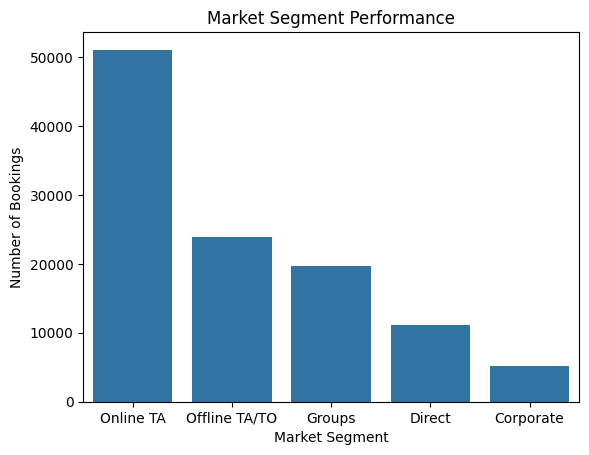

In [27]:
#market segment performance
segment_perf = cleaned_df1['market_segment'].value_counts().head()
sns.barplot(x=segment_perf.index, y=segment_perf.values)
plt.title('Market Segment Performance')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')

Text(0, 0.5, 'Count')

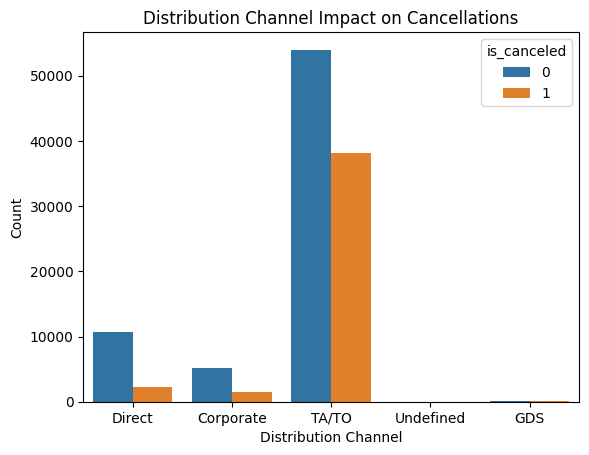

In [28]:
#distribution channel impact
sns.countplot(x=cleaned_df1.distribution_channel, hue=cleaned_df.is_canceled)
plt.title('Distribution Channel Impact on Cancellations')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')